<a href="https://colab.research.google.com/github/MahekBhatia123/Cat-dog_Classification/blob/main/cat_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list | head




ref                                                             title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset    Global Earthquake-Tsunami Risk Assessment Dataset       16151  2025-10-01 16:35:53.273000          17893        615  1.0              
jaderz/hospital-beds-management                                 Hospital Beds Management                                47583  2025-10-03 09:21:58.590000          15118        357  1.0              
jockeroika/life-style-data                                      Life Style Data                                       3995645  2025-10-14 13:50:45.303000          20857        406  0.8235294        
rehan

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog



Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 71% 155M/218M [00:00<00:00, 1.62GB/s]
100% 218M/218M [00:00<00:00, 989MB/s] 


In [ ]:
import zipfile
with zipfile.ZipFile("/content/cat-and-dog.zip", "r") as zip_ref:
    zip_ref.extractall("/content/dogs-vs-cats-data")




In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
import os

for root, dirs, files in os.walk("/content/dogs-vs-cats-data"):
    print("📂 Directory:", root)
    for name in files[:5]:  # show only first 5 files per folder
        print("   -", name)


📂 Directory: /content/dogs-vs-cats-data
📂 Directory: /content/dogs-vs-cats-data/test_set
📂 Directory: /content/dogs-vs-cats-data/test_set/test_set
📂 Directory: /content/dogs-vs-cats-data/test_set/test_set/dogs
   - dog.4828.jpg
   - dog.4994.jpg
   - dog.4693.jpg
   - dog.4512.jpg
   - dog.4907.jpg
📂 Directory: /content/dogs-vs-cats-data/test_set/test_set/cats
   - cat.4995.jpg
   - cat.4754.jpg
   - cat.4408.jpg
   - cat.4292.jpg
   - cat.4163.jpg
📂 Directory: /content/dogs-vs-cats-data/training_set
📂 Directory: /content/dogs-vs-cats-data/training_set/training_set
📂 Directory: /content/dogs-vs-cats-data/training_set/training_set/dogs
   - dog.519.jpg
   - dog.3793.jpg
   - dog.2632.jpg
   - dog.1640.jpg
   - dog.3982.jpg
📂 Directory: /content/dogs-vs-cats-data/training_set/training_set/cats
   - cat.3482.jpg
   - cat.2013.jpg
   - cat.2633.jpg
   - cat.1377.jpg
   - cat.154.jpg


In [ ]:
import shutil
import os

# Move training data
shutil.move("/content/dogs-vs-cats-data/training_set/training_set",
            "/content/dogs-vs-cats-data/training_set_tmp")
shutil.rmtree("/content/dogs-vs-cats-data/training_set")
os.rename("/content/dogs-vs-cats-data/training_set_tmp",
          "/content/dogs-vs-cats-data/training_set")

# Move test data
shutil.move("/content/dogs-vs-cats-data/test_set/test_set",
            "/content/dogs-vs-cats-data/test_set_tmp")
shutil.rmtree("/content/dogs-vs-cats-data/test_set")
os.rename("/content/dogs-vs-cats-data/test_set_tmp",
          "/content/dogs-vs-cats-data/test_set")

print("✅ Folder structure fixed!")


✅ Folder structure fixed!


In [ ]:
from tensorflow import keras

train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dogs-vs-cats-data/training_set",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dogs-vs-cats-data/test_set",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)



Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [ ]:
#create cnn model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,733,217 (14.24 MB)

 Trainable params: 3,732,961 (14.24 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
history=model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.5706 - loss: 1.2413 - val_accuracy: 0.4928 - val_loss: 0.9724
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.6238 - loss: 0.7096 - val_accuracy: 0.5131 - val_loss: 1.6777
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.6852 - loss: 0.6009 - val_accuracy: 0.7118 - val_loss: 0.5941
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7641 - loss: 0.4956 - val_accuracy: 0.7286 - val_loss: 0.5579
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.8015 - loss: 0.4217 - val_accuracy: 0.7360 - val_loss: 0.6046
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - accuracy: 0.8547 - loss: 0.3348 - val_accuracy: 0.7098 - val_loss: 0.7483
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - accuracy: 0.9032 - loss: 0.2329 - val_accuracy: 0.7405 - val_loss: 0.7480
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.9437 - loss: 0.1447 

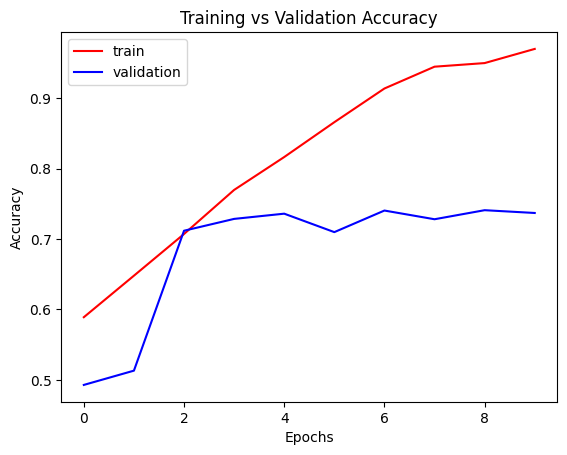

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.show()



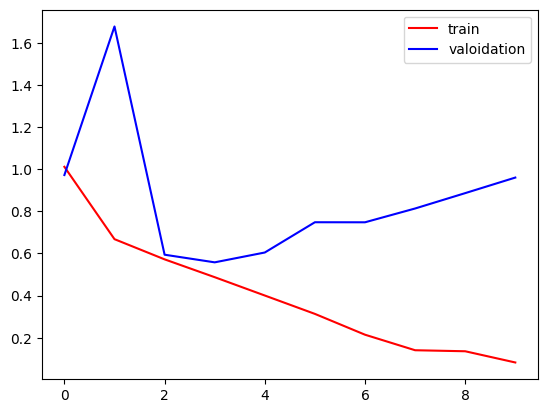

In [ ]:
plt.plot(history.history["loss"],color="red",label="train")
plt.plot(history.history["val_loss"],color="blue",label="valoidation")
plt.legend()
plt.show()

In [ ]:
import cv2

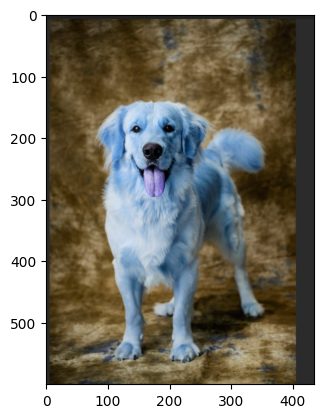

In [ ]:
test_img=cv2.imread("/content/dog.png")
plt.imshow(test_img)

In [ ]:
test_img.shape

(600, 435, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

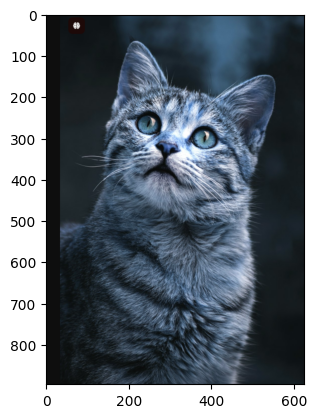

In [ ]:
test_img=cv2.imread("/content/cat.png")
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[0.]], dtype=float32)